# Fake news detection

## Methods: TFIDF and PassiveAgressiveClassifier

<span style="color:blue"> **Dataset**</span>
:<br> * news.csv *:<br>
The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sb
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [13]:
df= pd.read_csv('news.csv')

In [14]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


<AxesSubplot:xlabel='label', ylabel='count'>

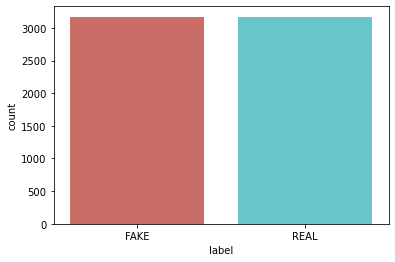

In [15]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')
# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(df)

In [16]:
labels=df.label

In [17]:
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

## Split dataset to training and test sets

In [18]:
x_train,x_test,y_train,y_test = train_test_split(df['text'],labels, test_size=0.2, random_state=8)

In [19]:
x_test.shape

(1267,)

### Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7

In [20]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Next, we’ll initialize a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.

In [22]:
#DataFlair - Initialize a PassiveAggressiveClassifier
classifier=PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=classifier.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")

Accuracy: 93.45%
Classification Report : 

              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.94       636
        REAL       0.94      0.93      0.93       631

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



Accuracy: 93.45%
Confusion matrix, without normalization


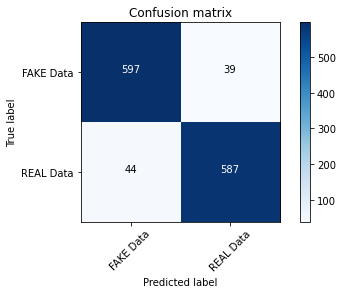

In [23]:
Y_pred = classifier.predict(tfidf_test)
score = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Calculate the accuracy and Classification report

In [ ]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

<span style="color:red"> 597 true positives, 587 true negatives, 44 false positives, and 39 false negatives.</span>